In [7]:
from qiskit import QuantumCircuit, execute

In [8]:
from qiskit.providers.aer import AerSimulator

sim = AerSimulator()

# Half Adder

## A half adder adds two bits and produces two outputs; Sum and carry out.

A Half Adder does not account for the fact that we may have a carry in

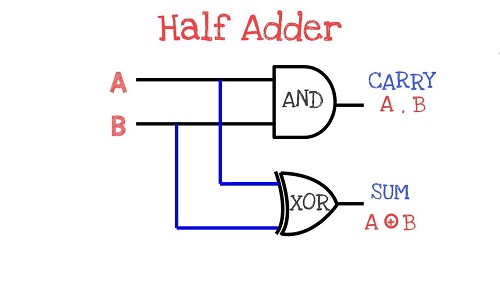

### Below is my implementation of a Half Adder in Qiskit adding '1' and '1'.
Hence the X gates.

The qubits q0 and q1 represent our inputs.

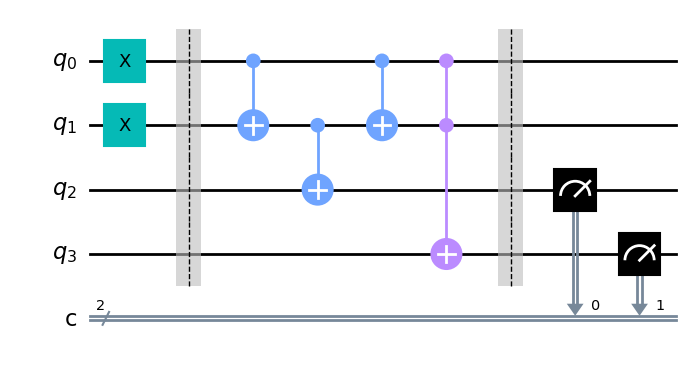

In [9]:
qc_1 = QuantumCircuit(4,2)

qc_1.x([0,1])

qc_1.barrier()
qc_1.cx(0,1)
qc_1.cx(1,2)
qc_1.cx(0,1)
qc_1.ccx(0,1,3)

qc_1.barrier()
qc_1.measure([2,3],[0,1])
qc_1.draw('mpl')

In [10]:
job_1 = sim.run(qc_1)

result_1 = job_1.result().get_counts()

In [11]:
ans = list(result_1.keys())[0]

print(f"The sum of '1' and '1' equals {ans}")

The sum of '1' and '1' equals 10


### A function that implements the Half Adder on two bits, a and b

In [14]:
def h_a(a,b):
    
    a= int(a)
    b= int(b)
    
    qc = QuantumCircuit(3,2)

    if a == 0:
        qc.i(0)
    else:
        qc.x(0)
    
    if b == 0:
        qc.i(1)
    else:
        qc.x(1)

    qc.barrier()
    qc.ccx(0,1,2)
    qc.cx(0,1)

    qc.barrier()
    qc.measure([1,2],[0,1])
    # display(qc.draw('mpl')) ## Uncomment to see the displayed circuit
    
    job = sim.run(qc)
    result = job.result().get_counts()
    
    return result

In [15]:
inp = [0,1]

for i in inp:
    for j in inp:
        
        result = h_a(i,j)
        print(f"The sum of {i}, and {j} is {list(result)[0]}")

The sum of 0, and 0 is 00
The sum of 0, and 1 is 01
The sum of 1, and 0 is 01
The sum of 1, and 1 is 10


# Full Adder

### A Full adder adds three bits; a, b, and a c_in (carry in) giving us two outputs; Sum and carry out.
A Full Adder accounts for the fact that we may have a carry in.

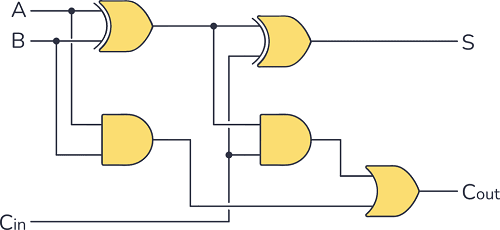

My implementation of the Full Adder requires 7 qubits. Three of these qubits (q0, q1, q2) are the inputs (a, b, c_in).

The other 4 are used in implementing the logic calculations.

The outputs (c_out, sum), are read out from two qubits (q6, q3).

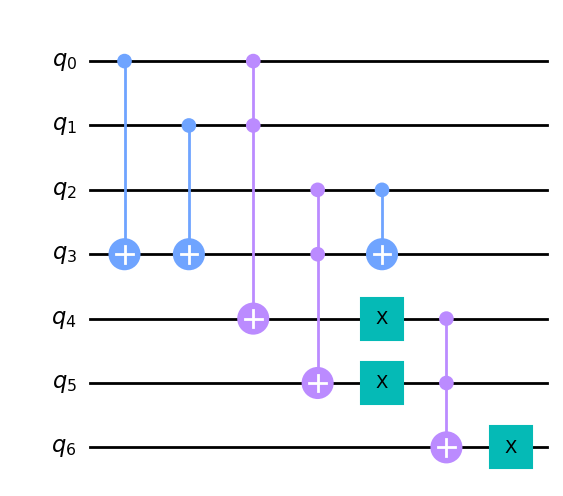

In [19]:
q_c = QuantumCircuit(7)

q_c.cx(0,3)
q_c.cx(1,3)

q_c.ccx(0,1,4)

q_c.ccx(2,3,5)
q_c.cx(2,3)

q_c.x([4,5])
q_c.ccx(4,5,6)
q_c.x(6)


f_a_gate = q_c.to_gate()
f_a_gate.name = "Full Adder" ## Converting to a gate for easy visualization/abstraction when concatenating.

q_c.draw('mpl')

### A function that implements the Full Adder on two bits, a, b and c_in

In [20]:
def f_add(a,b,c_in):
    
    a= int(a)
    b= int(b)
    c= int(c_in)
    
    f_adder = QuantumCircuit(7,2)
    
    if a == 1:
        f_adder.x(0)
    
    if b == 1:
        f_adder.x(1)
    
    if c == 1:
        f_adder.x(2)

    f_adder.append(f_a_gate, range(7))

    f_adder.draw('mpl')
    f_adder.measure([3,6],[0,1])

    # display(f_adder.draw('mpl'))
    
    job = execute(f_adder, backend= sim)
    result_ = job.result().get_counts()
    
    return result_

In [21]:
inp = [0,1]

for i in inp:
    for j in inp:
        for k in inp:
        
            result = f_add(i,j,k)
            print(f"The sum of {i}, {j}, and {k} is {list(result)[0]}")

The sum of 0, 0, and 0 is 00
The sum of 0, 0, and 1 is 01
The sum of 0, 1, and 0 is 01
The sum of 0, 1, and 1 is 10
The sum of 1, 0, and 0 is 01
The sum of 1, 0, and 1 is 10
The sum of 1, 1, and 0 is 10
The sum of 1, 1, and 1 is 11


# Adder

## I will now use the designed Full Adder to create a 'calculator' to add two numbers.

First we'd have to convert our input numbers to binary, before we apply our adder circuit.

Recall that a 1-bit full adder (in our implementation) requires 7 qubits. So if we are adding two 4-bit numbers, we will require (4*7)= 27 qubits

In [74]:
def q_adder(x,y):
    
    x = bin(x)[2:]
    y = bin(y)[2:]
    
    diff = len(x)-len(y)
    if diff>0:
        y = ('0'*abs(diff)) + y
    else:
        x = ('0'*abs(diff)) + x
    
    n = len(y)
    
    qc = QuantumCircuit(n*7, n+1)
    
    inputs = [[x[i],y[i],0] for i in range(n)][::-1]
    
    for i in range(n):
        if inputs[i][0] == '1':
            qc.x(7*i)
    
        if inputs[i][1] == '1':
            qc.x(7*i + 1)
    
    for i in range(n):
        qc.append(f_a_gate, range(i*7, i*7 +7))
        if i < n-1:
            qc.cx(i*7 +6, (i+1)*7 +2)
            
    meas_list = []
    for i in range(n):
        meas_list.append(7*i +3)
    meas_list.append(n*7 - 1)
    
    bit_list = [i for i in range(n+1)]
    
    qc.measure(meas_list, bit_list)
    
    circuit = qc.draw('mpl')
    
    job = execute(qc, backend= sim)
    result = job.result().get_counts()
    
    return result, circuit

In [87]:
(ans, circ) = q_adder(4,2)

In [88]:
# circ ## Uncomment to view the adder circuit

In [89]:
answer_bin = str(list(ans.keys())[0])
print(f"The sum in binary form is {answer_bin}")

answer_dec = int('0b'+answer_bin, 2)
print(f"The sum in decimal form is {answer_dec}")

The sum in binary form is 0110
The sum in decimal form is 6


# Comparing the runtime of our quantum adder circuit with a simple function to add two numbers

In [83]:
def add(x, y):
    
    return x+y

In [90]:
%%timeit

add(4,2)

165 ns ± 19 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [91]:
%%timeit

(ans, circ) = q_adder(4,2)

answer = str(list(ans.keys())[0])

answer_dec = int('0b'+answer_bin, 2)

909 ms ± 161 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
